In [27]:
# Import package
from autodp import rdp_bank, rdp_acct, dp_acct,privacy_calibrator
import numpy as np

In [28]:
# declare the moment accountants
acct = rdp_acct.anaRDPacct()

##  Some experiments to test how close RDP(inf) can be used to approximate RDP(2).

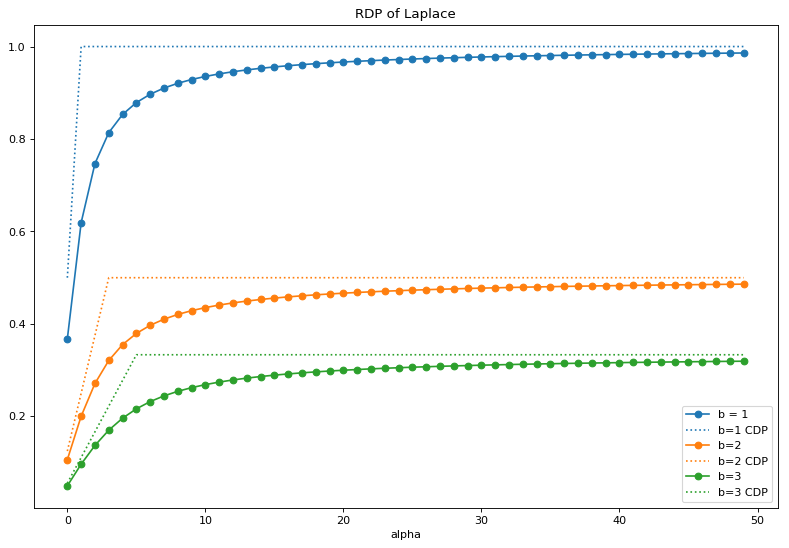

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline 

blist = [1,2,3]
rlist = []

ra_list = []


k=50

for b in blist:
    func_laplace = lambda x: rdp_bank.RDP_laplace({'b': b}, x)
    func_puredp = lambda x: rdp_bank.RDP_pureDP({'eps':1/b},x)

    results = [func_laplace(i+1) for i in range(k)]
    results1 = [func_puredp(i+1) for i in range(k)]
    rlist.append(results)
    ra_list.append(results1)
    
    
colorlist = ['C0', 'C1', 'C2']
plt.figure(num=1, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')



for (item,item1,color) in zip(rlist,ra_list,colorlist):
    plt.plot(range(k), item,'-o',color=color)
    plt.plot(range(k),item1,':',color=color)

plt.legend(['b = 1','b=1 CDP','b=2','b=2 CDP', 'b=3','b=3 CDP'], loc='best')
plt.title('RDP of Laplace')
plt.xlabel('alpha')
plt.show()

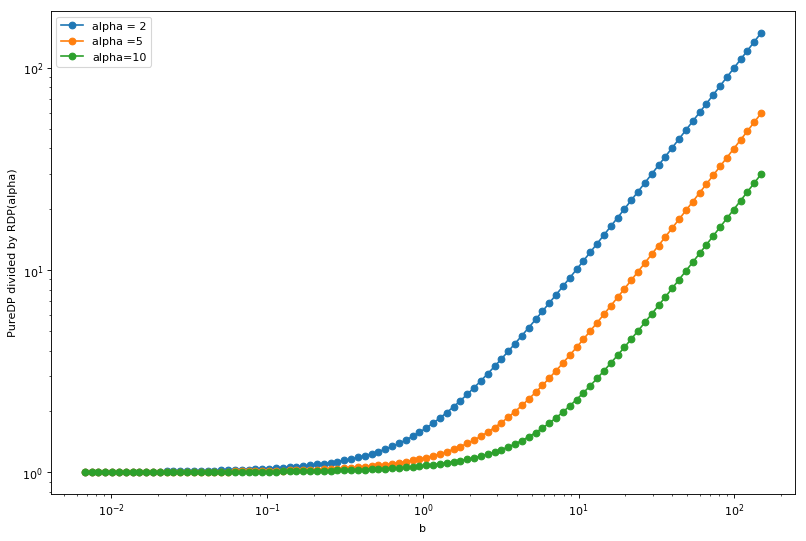

In [37]:

blist = np.exp(np.linspace(-5,5,100))
alphalist = [2,5, 10]
resultslist = []

for alpha in alphalist:
    results =[]
    for b in blist:
        func_laplace = lambda x: rdp_bank.RDP_laplace({'b': 1.0*b}, x)
        results.append(func_laplace(np.inf)/func_laplace(alpha))
    resultslist.append(results)

    
plt.figure(num=1, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for results in resultslist:
    plt.loglog(blist, results,'-o')
    plt.legend(['alpha = 2', 'alpha =5', 'alpha=10'], loc='best')
plt.xlabel('b')
plt.ylabel('PureDP divided by RDP(alpha)')
plt.show()

## The better approximation

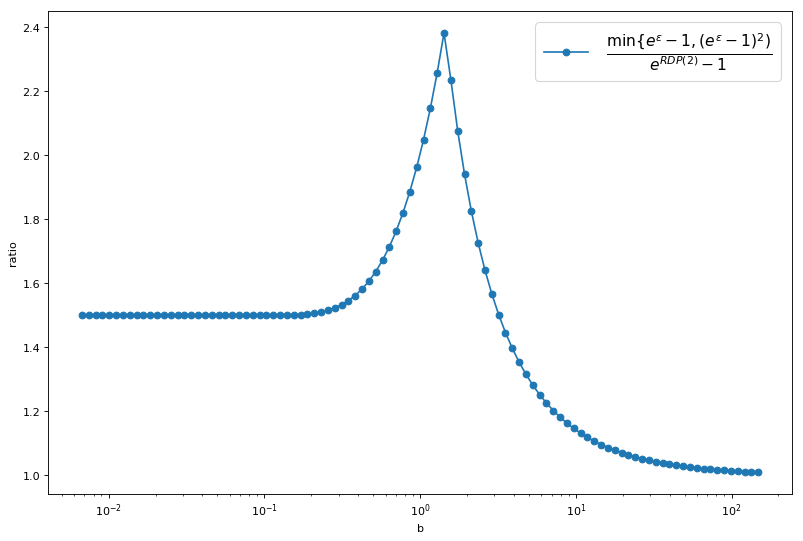

In [38]:

blist = np.exp(np.linspace(-5,5,100))
alphalist = [2]
resultslist = []

for alpha in alphalist:
    results =[]
    for b in blist:
        func_laplace = lambda x: rdp_bank.RDP_laplace({'b': 1.0*b}, x)
        
        results.append(np.minimum(np.exp(func_laplace(np.inf))-1,(np.exp(func_laplace(np.inf))-1)**2)/(np.exp(func_laplace(alpha))-1))
    resultslist.append(results)

    
plt.figure(num=1, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for results in resultslist:
    plt.semilogx(blist, results,'-o')
    plt.legend([r'$\frac{\min \{e^{\epsilon}-1,(e^{\epsilon}-1)^2)}{e^{RDP(2)}-1}$'], loc='best',fontsize=20)
plt.xlabel('b')
plt.ylabel('ratio')
plt.show()

In [39]:

acct = rdp_acct.anaRDPacct(m_lin_max=1300) # approx using eps(2) and eps
acct_approx = rdp_acct.anaRDPacct(m_lin_max=1300) # approx using only eps
acct_approx2 = rdp_acct.anaRDPacct(m_lin_max=1300) # approx using only subsampled cdp bound
acct_exact = rdp_acct.anaRDPacct(m_lin_max=1300) # direct calculation
b=5
prob = 0.01
params={}
params1 ={}
params2={}
params['b'] = b

laplace = lambda x: rdp_bank.RDP_laplace(params,x)
epsdp = lambda x:rdp_bank.RDP_pureDP({'eps':1/b},x)

params1['eps'] = laplace(np.inf)
params1['prob'] = prob


params2['eps'] = laplace(np.inf)
params2['eps2'] = laplace(2)
params2['prob'] = prob

func1 = lambda x: rdp_bank.RDP_subsampled_pureDP(params1, x)
func2 = lambda x: rdp_bank.RDP_subsampled_pureDP(params2, x)

acct.compose_mechanism(func2,coeff=1000)
acct_approx.compose_mechanism(func1,coeff=1000)

acct_exact.compose_poisson_subsampled_mechanisms(laplace, prob, coeff=1000)
acct_approx2.compose_poisson_subsampled_mechanisms(epsdp,prob,coeff=1000)
accts = [acct_exact,acct,acct_approx,acct_approx2]

resultslist = []

for item in accts:
    item.build_zeroth_oracle()
    rdps = [item.evalRDP(1.0*(i+1)) for i in range(2000)]
    resultslist.append(rdps)


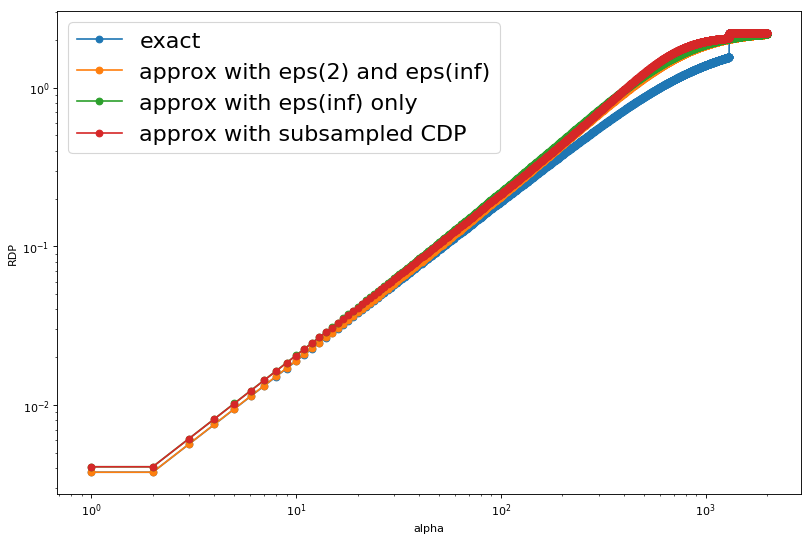

In [22]:
plt.figure(num=1, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

for results in resultslist:
    plt.loglog(np.linspace(1,2001,2000), results,'-o')

    
plt.legend(['exact','approx with eps(2) and eps(inf)',
            'approx with eps(inf) only','approx with subsampled CDP'], loc='best',fontsize=20)
plt.xlabel('alpha')
plt.ylabel('RDP')
plt.show()